In [2]:
import numpy as np 
import pandas as pd 
import altair as alt
import re 
import ntpath 
from commons import data_processing
from commons.APICallers import uniprot

In [5]:
files = data_processing.get_files('./data/DIA/', exts=['.parquet'])

df = pd.DataFrame()
for file in files:
    spl = re.split(r'[\\\/]', file)
    data = pd.read_parquet(file)
    data.loc[:, 'column'] = spl[-2]

    df = pd.concat([df, data])
    df.reset_index(inplace=True, drop=True)
df

,File.Name,Run,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,PG.MaxLFQ,Genes.Quantity,...,PTM.Specific,PTM.Localising,PTM.Q.Value,PTM.Site.Confidence,Lib.PTM.Site.Confidence,IM,iIM,Predicted.IM,Predicted.iIM,column
0,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_MT10_DIA_run1,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,10255300.0,10433500.0,8622070.0,10255300.0,...,3.59453,4.525610,0.000274,0.997890,0.997890,0,0,0,0,PGC
1,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_MT10_DIA_run2,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,6631310.0,6280510.0,8713450.0,6631310.0,...,2.21613,0.664891,1.000000,0.000000,0.997890,0,0,0,0,PGC
2,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_T10_DIA_run1,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,8969720.0,9171880.0,8086120.0,8969720.0,...,4.40373,5.767980,0.000215,0.997890,0.997890,0,0,0,0,PGC
3,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_T10_DIA_run2,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,8451090.0,8162900.0,8060560.0,8451090.0,...,4.38170,6.154440,0.000204,0.997890,0.997890,0,0,0,0,PGC
4,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_MT10_DIA_run2,Q99453,Q99453,PHX2B_HUMAN,PHOX2B,464113.0,489464.0,489464.0,464113.0,...,0.00000,0.000000,0.000000,0.000000,0.997394,0,0,0,0,PGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463931,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_RPLC_T10_DIA_run1,Q8N183,Q8N183,NDUF2_HUMAN,NDUFAF2,2589570.0,2305300.0,2358500.0,2589570.0,...,0.00000,0.000000,0.000000,0.997700,0.999776,0,0,0,0,RPLC
463932,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_RPLC_T10_DIA_run2,Q8N183,Q8N183,NDUF2_HUMAN,NDUFAF2,2914750.0,2927050.0,2532460.0,2914750.0,...,0.00000,0.000000,0.000000,0.998956,0.999776,0,0,0,0,RPLC
463933,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_RPLC_MT10_DIA_run1,Q8N183,Q8N183,NDUF2_HUMAN,NDUFAF2,3873280.0,3915560.0,3888120.0,3873280.0,...,0.00000,0.000000,0.000000,0.983069,0.979208,0,0,0,0,RPLC
463934,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_RPLC_MT10_DIA_run2,Q8N183,Q8N183,NDUF2_HUMAN,NDUFAF2,3371710.0,3456410.0,3918320.0,3371710.0,...,0.00000,0.000000,0.000000,0.949859,0.979208,0,0,0,0,RPLC


In [6]:
columns = [c.lower().replace('.', '_') for c in df.columns]
df.columns = columns

df.loc[:, 'sample'] = df.run.map(lambda x: x.split('_')[-3])
df.loc[:, 'tech_rep'] = df.run.map(lambda x: x.split('_')[-1])

df

,file_name,run,protein_group,protein_ids,protein_names,genes,pg_quantity,pg_normalised,pg_maxlfq,genes_quantity,...,ptm_q_value,ptm_site_confidence,lib_ptm_site_confidence,im,iim,predicted_im,predicted_iim,column,sample,tech_rep
0,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_MT10_DIA_run1,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,10255300.0,10433500.0,8622070.0,10255300.0,...,0.000274,0.997890,0.997890,0,0,0,0,PGC,MT10,run1
1,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_MT10_DIA_run2,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,6631310.0,6280510.0,8713450.0,6631310.0,...,1.000000,0.000000,0.997890,0,0,0,0,PGC,MT10,run2
2,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_T10_DIA_run1,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,8969720.0,9171880.0,8086120.0,8969720.0,...,0.000215,0.997890,0.997890,0,0,0,0,PGC,T10,run1
3,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_T10_DIA_run2,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,8451090.0,8162900.0,8060560.0,8451090.0,...,0.000204,0.997890,0.997890,0,0,0,0,PGC,T10,run2
4,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_PGC_MT10_DIA_run2,Q99453,Q99453,PHX2B_HUMAN,PHOX2B,464113.0,489464.0,489464.0,464113.0,...,0.000000,0.000000,0.997394,0,0,0,0,PGC,MT10,run2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463931,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_RPLC_T10_DIA_run1,Q8N183,Q8N183,NDUF2_HUMAN,NDUFAF2,2589570.0,2305300.0,2358500.0,2589570.0,...,0.000000,0.997700,0.999776,0,0,0,0,RPLC,T10,run1
463932,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_RPLC_T10_DIA_run2,Q8N183,Q8N183,NDUF2_HUMAN,NDUFAF2,2914750.0,2927050.0,2532460.0,2914750.0,...,0.000000,0.998956,0.999776,0,0,0,0,RPLC,T10,run2
463933,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_RPLC_MT10_DIA_run1,Q8N183,Q8N183,NDUF2_HUMAN,NDUFAF2,3873280.0,3915560.0,3888120.0,3873280.0,...,0.000000,0.983069,0.979208,0,0,0,0,RPLC,MT10,run1
463934,E:\Research\MS Data\Lumos\20221109\20221109_GD...,20221109_GD_RPLC_MT10_DIA_run2,Q8N183,Q8N183,NDUF2_HUMAN,NDUFAF2,3371710.0,3456410.0,3918320.0,3371710.0,...,0.000000,0.949859,0.979208,0,0,0,0,RPLC,MT10,run2


In [9]:
exp = df.copy()
print(len(exp))
exp.loc[:, 'protein_ids'] = exp.protein_ids.str.split(';')
exp = exp.explode('protein_ids')
print(len(exp))

463936
510119


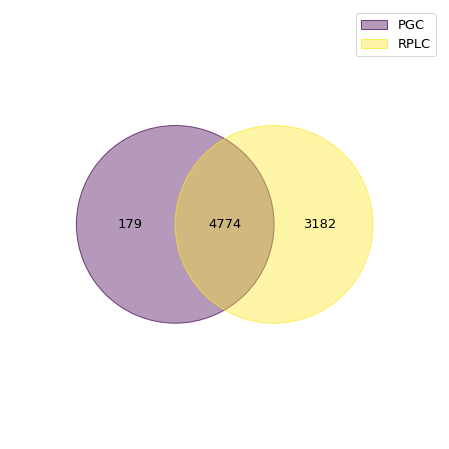

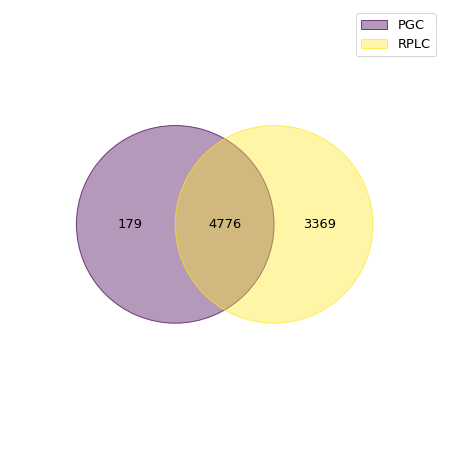

In [11]:
from venn import venn 

for sample in exp['sample'].unique():
    small = exp[exp['sample']==sample]
    overlap = {}
    for column in small.column.unique():
        overlap[column] = set(small[small.column==column].protein_ids.tolist())
    venn(overlap)